# **INTRODUCTION**
**Aim of the Notebook is:**

capture complex relationships between the features and the targets and feature interactions’ effect on the targets, building a performant predictive model might be a strong tool towards that main goal.

**The dataset contains a set of 9206 records under 15 attributes**

| Column Name                         | Description                                                    |
|------------------                   |----------------------------------------------------------------|
| `WellID`                   | A unique 10-digit identifier for each well                                             |
| `BVHH`                       | A positive number indicating rock quality at the area a certain well is drilled.                       |
| `FormationAlias`                  | The zone/rock in the earth’s crust the well extracts oil and gas from                 |
| `NioGOR`                   | A positive number indicating the Gas-to-Oil ratio in the Niobrara formation at the well’s coordinates |
| `CodGOR`                         | A positive number indicating the Gas-to-Oil ratio in the Codell formation at the well’s coordinates                                              |
| `LateralLength`                          | The length of the drilled well in feet                            |
| `ProppantPerFoot`                 | The amount (in pounds) of proppant (a chemical used to frac a well) per foot of the well’s length                                                      |
| `FluidPerFoot`         | The amount (in gallons) of fluid (used to frac the well) per foot of the well’s length |
| `{Left/Right}Distance`                       | The distance away from th {left/right} nearest neighbouring well               |
| `{Left/Right}NeighbourType`              | Whether this well’s {left/right} neighbouring well was drilled prior to the well (parent), drilled with the well (co-developed), or no existing neighbour             |
| `TVD`                       | The depth of the well (True Vertical Depth)                   |
| `NormalizedOilEUR`                 |  The amount of oil (in bbl/ft) produced by the well in its lifetime normalized by its lateral length|
| `NormalizedGasEUR`    | The amount of gas (in mcf/ft) produced by the well in its lifetime normalized by its lateral length. |



**Steps:**

*   Perform data cleaning on the dataset
*   Choose and use methods of data filling for missing values
*   Drop unsuitable features
*   Extract a feature from feature(s)
*   Split dataset and perform individual analysis on each subset of data
*   Build a model to predict the targets
*   Pre-process features for modelling/analysis, ex: encode, scale, apply complex transformations, etc.

# **Libraries📕📗📘**

In [1]:
pip install shap

In [2]:
import numpy as np
import pandas as pd
import missingno as ms
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import shap
import plotly.express as px
import plotly.graph_objects as go
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **Data collection and Analysis**

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
data = pd.read_csv('/content/drive/MyDrive/DataScientistTask_Dataset.csv')

In [5]:
data.head(10)

WellID      BVHH FormationAlias       NioGOR       CodGOR  \
0  500109742  1.105028       NIOBRARA  1687.414535          NaN   
1  500109753  0.644480       NIOBRARA  2267.667384          NaN   
2  500109754  0.620268       NIOBRARA  2368.236087          NaN   
3  500109760  0.649670       NIOBRARA   333.876618          NaN   
4  500109772  1.423475       NIOBRARA  3608.065949  3199.962930   
5  500109773  1.368585       NIOBRARA  3899.971877  3133.110269   
6  500109775  1.392838       NIOBRARA  3769.822078  3171.787991   
7  500109777  1.372893         CODELL  3827.060082  3171.913583   
8  500109779  1.168352       NIOBRARA  1784.744088          NaN   
9  500109805  1.182178       NIOBRARA  1846.999552          NaN   

   LateralLength  ProppantPerFoot  FluidPerFoot  LeftDistance  \
0         8084.0      1256.308758   1234.370856           NaN   
1         3912.0       742.842536    784.000000           NaN   
2         4137.0       912.738700   1127.047136        1330.0   
3         4161.0       914.683970    691.026676           NaN   
4         4418.0       747.271843    928.239928           NaN   
5         4246.0       709.373528    957.364578           NaN   
6         4273.0       955.707933   1027.864732         601.0   
7         4393.0       893.694514    796.078306           NaN   
8         3896.0      1975.872690   1308.910164           NaN   
9         8400.0      1398.333333    907.660000           NaN   

  LeftNeighbourType  RightDistance RightNeighbourType     TVD  \
0       NoNeighbour            NaN        NoNeighbour  7501.0   
1       NoNeighbour         1330.0        Codeveloped  7551.0   
2       Codeveloped            NaN        NoNeighbour  7594.0   
3       NoNeighbour            NaN        NoNeighbour  7391.0   
4       NoNeighbour            NaN        NoNeighbour  7838.0   
5       NoNeighbour          601.0        Codeveloped  7941.0   
6       Codeveloped          569.0             Parent  7949.0   
7       NoNeighbour          629.0             Parent  8078.0   
8       NoNeighbour            NaN        NoNeighbour  7629.0   
9       NoNeighbour            NaN        NoNeighbour  7999.0   

   NormalizedOilEUR  NormalizedGasEUR  
0         15.234785         37.674048  
1          5.327198         11.627301  
2          5.629925         14.544356  
3          8.240087          7.012257  
4         15.374830         51.169534  
5         10.570419         43.056524  
6         10.016148         64.465247  
7         20.594127         83.218302  
8         38.614733         87.999487  
9         26.021905         56.498214

In [6]:
data.dtypes

WellID                  int64
BVHH                  float64
FormationAlias         object
NioGOR                float64
CodGOR                float64
LateralLength         float64
ProppantPerFoot       float64
FluidPerFoot          float64
LeftDistance          float64
LeftNeighbourType      object
RightDistance         float64
RightNeighbourType     object
TVD                   float64
NormalizedOilEUR      float64
NormalizedGasEUR      float64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9206 entries, 0 to 9205
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   WellID              9206 non-null   int64  
 1   BVHH                7565 non-null   float64
 2   FormationAlias      9206 non-null   object 
 3   NioGOR              8709 non-null   float64
 4   CodGOR              7538 non-null   float64
 5   LateralLength       9206 non-null   float64
 6   ProppantPerFoot     8974 non-null   float64
 7   FluidPerFoot        8942 non-null   float64
 8   LeftDistance        6758 non-null   float64
 9   LeftNeighbourType   9206 non-null   object 
 10  RightDistance       6778 non-null   float64
 11  RightNeighbourType  9206 non-null   object 
 12  TVD                 8893 non-null   float64
 13  NormalizedOilEUR    9206 non-null   float64
 14  NormalizedGasEUR    9206 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 1.1+ 

In [8]:
data.shape

(9206, 15)

In [9]:
data.isnull().sum()

WellID                   0
BVHH                  1641
FormationAlias           0
NioGOR                 497
CodGOR                1668
LateralLength            0
ProppantPerFoot        232
FluidPerFoot           264
LeftDistance          2448
LeftNeighbourType        0
RightDistance         2428
RightNeighbourType       0
TVD                    313
NormalizedOilEUR         0
NormalizedGasEUR         0
dtype: int64

# **Data Preprocessing**

> **Data Cleaning and Fill Missing(NULLS)**

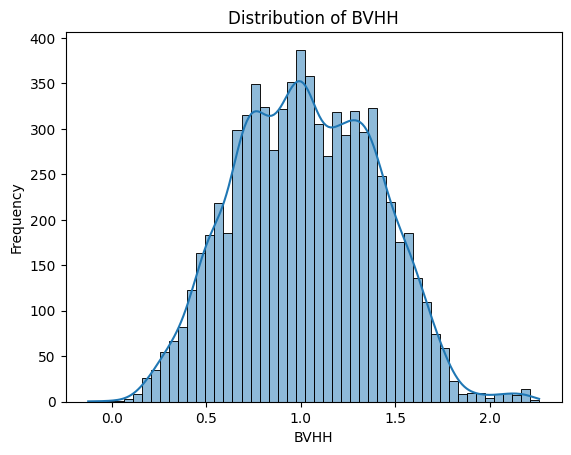

In [10]:
sns.histplot(data['BVHH'], bins=50, kde=True)
plt.title('Distribution of BVHH')
plt.xlabel('BVHH')
plt.ylabel('Frequency')
plt.show()

In [11]:
data.head(10)

WellID      BVHH FormationAlias       NioGOR       CodGOR  \
0  500109742  1.105028       NIOBRARA  1687.414535          NaN   
1  500109753  0.644480       NIOBRARA  2267.667384          NaN   
2  500109754  0.620268       NIOBRARA  2368.236087          NaN   
3  500109760  0.649670       NIOBRARA   333.876618          NaN   
4  500109772  1.423475       NIOBRARA  3608.065949  3199.962930   
5  500109773  1.368585       NIOBRARA  3899.971877  3133.110269   
6  500109775  1.392838       NIOBRARA  3769.822078  3171.787991   
7  500109777  1.372893         CODELL  3827.060082  3171.913583   
8  500109779  1.168352       NIOBRARA  1784.744088          NaN   
9  500109805  1.182178       NIOBRARA  1846.999552          NaN   

   LateralLength  ProppantPerFoot  FluidPerFoot  LeftDistance  \
0         8084.0      1256.308758   1234.370856           NaN   
1         3912.0       742.842536    784.000000           NaN   
2         4137.0       912.738700   1127.047136        1330.0   
3         4161.0       914.683970    691.026676           NaN   
4         4418.0       747.271843    928.239928           NaN   
5         4246.0       709.373528    957.364578           NaN   
6         4273.0       955.707933   1027.864732         601.0   
7         4393.0       893.694514    796.078306           NaN   
8         3896.0      1975.872690   1308.910164           NaN   
9         8400.0      1398.333333    907.660000           NaN   

  LeftNeighbourType  RightDistance RightNeighbourType     TVD  \
0       NoNeighbour            NaN        NoNeighbour  7501.0   
1       NoNeighbour         1330.0        Codeveloped  7551.0   
2       Codeveloped            NaN        NoNeighbour  7594.0   
3       NoNeighbour            NaN        NoNeighbour  7391.0   
4       NoNeighbour            NaN        NoNeighbour  7838.0   
5       NoNeighbour          601.0        Codeveloped  7941.0   
6       Codeveloped          569.0             Parent  7949.0   
7       NoNeighbour          629.0             Parent  8078.0   
8       NoNeighbour            NaN        NoNeighbour  7629.0   
9       NoNeighbour            NaN        NoNeighbour  7999.0   

   NormalizedOilEUR  NormalizedGasEUR  
0         15.234785         37.674048  
1          5.327198         11.627301  
2          5.629925         14.544356  
3          8.240087          7.012257  
4         15.374830         51.169534  
5         10.570419         43.056524  
6         10.016148         64.465247  
7         20.594127         83.218302  
8         38.614733         87.999487  
9         26.021905         56.498214

In [12]:
def plot_missing_data_matrix(df):
    ms.matrix(df, figsize=(10, 6), color=(0.25, 0.4, 0.8), sparkline=True, fontsize=12)

    plt.title('Missing Data Matrix', fontsize=16)
    plt.xlabel('Columns', fontsize=12)
    plt.ylabel('Data Points', fontsize=12)

    plt.show()

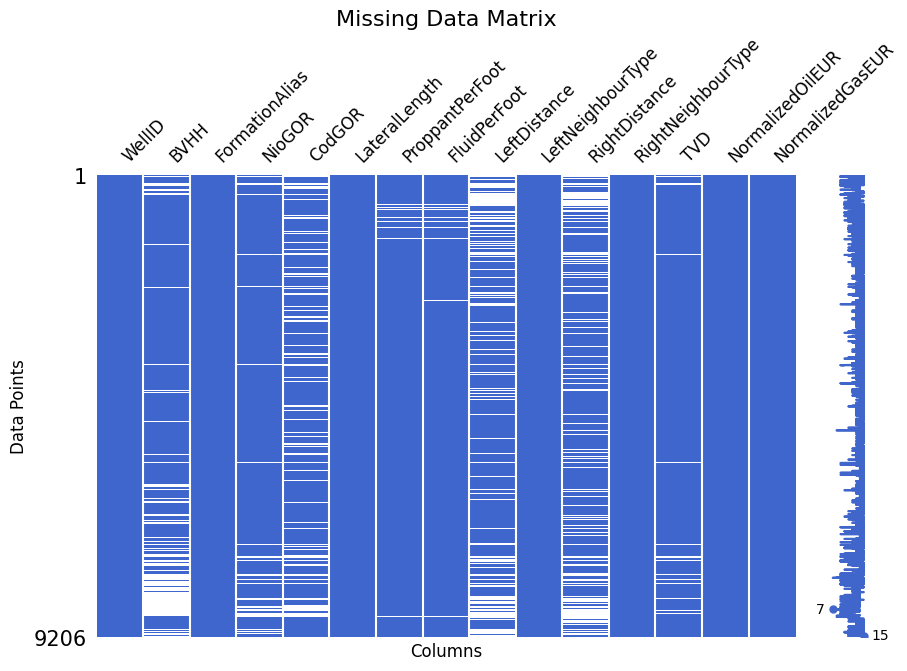

In [13]:
plot_missing_data_matrix(data)

**I initially used the KNN Imputer to handle missing values in the dataset, but it resulted in lower accuracy. Consequently, I opted for an alternative method.**

In [14]:
# # Using KNN Imputer to fill nulls

# categ_cols = ['FormationAlias', 'LeftNeighbourType', 'RightNeighbourType']
# num_cols = ['WellID', 'BVHH', 'NioGOR', 'CodGOR', 'LateralLength', 'ProppantPerFoot', 'FluidPerFoot', 'LeftDistance', 'RightDistance', 'TVD', 'NormalizedOilEUR', 'NormalizedGasEUR']
# encoder = OneHotEncoder(sparse=False)
# cat_encoded = encoder.fit_transform(data[categ_cols])
# cat_encoded_df = pd.DataFrame(cat_encoded, columns=encoder.get_feature_names_out(categ_cols))

# data_combined = pd.concat([data[num_cols], cat_encoded_df], axis=1)

# imputer = KNNImputer(n_neighbors=3)
# imputed_data = imputer.fit_transform(data_combined)
# imputed_df = pd.DataFrame(imputed_data, columns=data_combined.columns)

# cat_decoded = encoder.inverse_transform(imputed_df[cat_encoded_df.columns])
# imputed_df[categ_cols] = cat_decoded
# data = imputed_df[num_cols + categ_cols]

# data.head(10)

In [15]:
data.isnull().sum()

WellID                   0
BVHH                  1641
FormationAlias           0
NioGOR                 497
CodGOR                1668
LateralLength            0
ProppantPerFoot        232
FluidPerFoot           264
LeftDistance          2448
LeftNeighbourType        0
RightDistance         2428
RightNeighbourType       0
TVD                    313
NormalizedOilEUR         0
NormalizedGasEUR         0
dtype: int64

**Handle negatives for BVHH column**

In [16]:
data['BVHH'] = data['BVHH'].apply(lambda x: x if x >= 0 else np.nan)

<Axes: xlabel='FormationAlias', ylabel='count'>

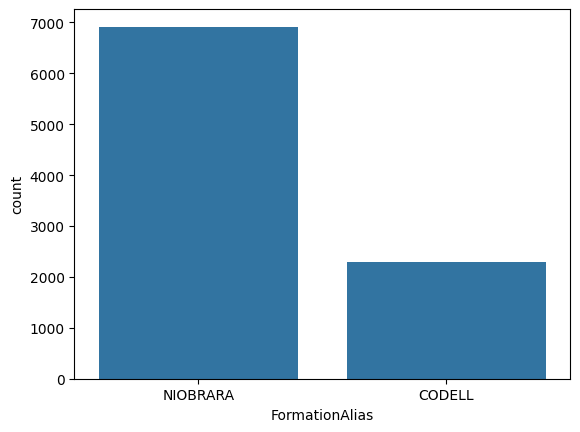

In [17]:
sns.countplot(x = 'FormationAlias', data = data)

In [18]:
data.describe()

WellID         BVHH         NioGOR        CodGOR  LateralLength  \
count  9.206000e+03  7563.000000    8709.000000   7538.000000    9206.000000   
mean   7.183554e+08     1.031304    4699.704950   4219.441933    6970.061820   
std    9.295257e+08     0.370412   12584.166286   3306.948828    2673.528748   
min    5.001097e+08     0.023189      85.752059    336.475960    1749.000000   
25%    5.123379e+08     0.750655    2189.721498   2314.007323    4349.250000   
50%    5.123416e+08     1.020486    3448.129246   3406.380480    6668.500000   
75%    5.123458e+08     1.310209    4900.703302   5001.128167    9596.000000   
max    4.902129e+09     2.260032  357894.183700  26193.592720   16676.000000   

       ProppantPerFoot  FluidPerFoot  LeftDistance  RightDistance  \
count      8974.000000   8942.000000   6758.000000    6778.000000   
mean       1013.557032   1035.336411    864.819473     877.969608   
std         529.759630    629.271011    925.304147     947.646937   
min           0.000000      0.001171     14.000000      14.000000   
25%         725.260473    703.318099    343.000000     344.000000   
50%         923.412724    862.066743    590.000000     591.000000   
75%        1153.233928   1207.024954    901.750000     903.000000   
max       10217.314930  20117.640690   5275.000000    5276.000000   

               TVD  NormalizedOilEUR  NormalizedGasEUR  
count  8893.000000       9206.000000       9206.000000  
mean   7013.938041         19.033831        105.802192  
std     616.775613          8.187220         66.225371  
min    2610.000000          0.000000          0.000000  
25%    6680.000000         13.646120         51.336490  
50%    7061.000000         17.722519         97.304146  
75%    7347.000000         23.020425        151.120432  
max    9793.000000         96.959244        465.849396

**As BVHH has no outlier so i will use mean to fill nulls**

In [19]:
data['BVHH'].fillna(data['BVHH'].mean(), inplace=True)

In [20]:
data['FormationAlias'].value_counts()

FormationAlias
NIOBRARA    6917
CODELL      2289
Name: count, dtype: int64

In [21]:
data.loc[data['FormationAlias'] == 'NIOBRARA', 'CodGOR'] = None
data.loc[data['FormationAlias'] == 'CODELL', 'NioGOR'] = None

In [22]:
data.head(10)

WellID      BVHH FormationAlias       NioGOR       CodGOR  \
0  500109742  1.105028       NIOBRARA  1687.414535          NaN   
1  500109753  0.644480       NIOBRARA  2267.667384          NaN   
2  500109754  0.620268       NIOBRARA  2368.236087          NaN   
3  500109760  0.649670       NIOBRARA   333.876618          NaN   
4  500109772  1.423475       NIOBRARA  3608.065949          NaN   
5  500109773  1.368585       NIOBRARA  3899.971877          NaN   
6  500109775  1.392838       NIOBRARA  3769.822078          NaN   
7  500109777  1.372893         CODELL          NaN  3171.913583   
8  500109779  1.168352       NIOBRARA  1784.744088          NaN   
9  500109805  1.182178       NIOBRARA  1846.999552          NaN   

   LateralLength  ProppantPerFoot  FluidPerFoot  LeftDistance  \
0         8084.0      1256.308758   1234.370856           NaN   
1         3912.0       742.842536    784.000000           NaN   
2         4137.0       912.738700   1127.047136        1330.0   
3         4161.0       914.683970    691.026676           NaN   
4         4418.0       747.271843    928.239928           NaN   
5         4246.0       709.373528    957.364578           NaN   
6         4273.0       955.707933   1027.864732         601.0   
7         4393.0       893.694514    796.078306           NaN   
8         3896.0      1975.872690   1308.910164           NaN   
9         8400.0      1398.333333    907.660000           NaN   

  LeftNeighbourType  RightDistance RightNeighbourType     TVD  \
0       NoNeighbour            NaN        NoNeighbour  7501.0   
1       NoNeighbour         1330.0        Codeveloped  7551.0   
2       Codeveloped            NaN        NoNeighbour  7594.0   
3       NoNeighbour            NaN        NoNeighbour  7391.0   
4       NoNeighbour            NaN        NoNeighbour  7838.0   
5       NoNeighbour          601.0        Codeveloped  7941.0   
6       Codeveloped          569.0             Parent  7949.0   
7       NoNeighbour          629.0             Parent  8078.0   
8       NoNeighbour            NaN        NoNeighbour  7629.0   
9       NoNeighbour            NaN        NoNeighbour  7999.0   

   NormalizedOilEUR  NormalizedGasEUR  
0         15.234785         37.674048  
1          5.327198         11.627301  
2          5.629925         14.544356  
3          8.240087          7.012257  
4         15.374830         51.169534  
5         10.570419         43.056524  
6         10.016148         64.465247  
7         20.594127         83.218302  
8         38.614733         87.999487  
9         26.021905         56.498214

In [23]:
count = data[['NioGOR', 'CodGOR']].isnull().all(axis=1).sum()
print(count)

508


**NioGOR and CodGOR has outliers so i will use median to fill nulls**

In [24]:
missing_both_rows = data[['NioGOR', 'CodGOR']].isnull().all(axis=1)

NioGOR_median = data.loc[data['FormationAlias'] == 'NIOBRARA', 'NioGOR'].median()
CodGOR_median = data.loc[data['FormationAlias'] == 'CODELL', 'CodGOR'].median()

for index, row in data[missing_both_rows].iterrows():
    if row['FormationAlias'] == 'NIOBRARA':
        data.at[index, 'NioGOR'] = NioGOR_median
    elif row['FormationAlias'] == 'CODELL':
        data.at[index, 'CodGOR'] = CodGOR_median

In [25]:
count = data[['NioGOR', 'CodGOR']].isnull().all(axis=1).sum()
count

0

**Handle missing here for both columns 'NioGOR', 'CodGOR' I will use 0 as indicator of no value**

In [26]:
data['NioGOR'].fillna(0, inplace=True)
data['CodGOR'].fillna(0, inplace=True)

In [27]:
data['LateralLength'].isnull().sum()

0

In [28]:
data['ProppantPerFoot'].isnull().sum()

232

In [29]:
data['FluidPerFoot'].isnull().sum()

264

**so the nulls in LeftDistance column is logic as NoNeighbour category has no
distance so I will replace it with 0**

In [30]:
data['LeftDistance'].isnull().sum()

2448

In [31]:
data['LeftDistance'].fillna(0, inplace=True)

**The nulls in RightDistance column is logic as NoNeighbour category has no
distance so I will replace it with 0**

In [32]:
data['RightDistance'].isnull().sum()

2428

In [33]:
data['RightDistance'].fillna(0, inplace=True)

**there is outlier in the given data for ProppantPerFoot and FluidPerFoot so I will use median to fill nulls**

In [34]:
data['ProppantPerFoot'].fillna(data['ProppantPerFoot'].median(), inplace=True)
data['FluidPerFoot'].fillna(data['FluidPerFoot'].median(), inplace=True)

In [35]:
data.columns

Index(['WellID', 'BVHH', 'FormationAlias', 'NioGOR', 'CodGOR', 'LateralLength',
       'ProppantPerFoot', 'FluidPerFoot', 'LeftDistance', 'LeftNeighbourType',
       'RightDistance', 'RightNeighbourType', 'TVD', 'NormalizedOilEUR',
       'NormalizedGasEUR'],
      dtype='object')

In [36]:
data['TVD'].fillna(data['TVD'].mean(), inplace=True)

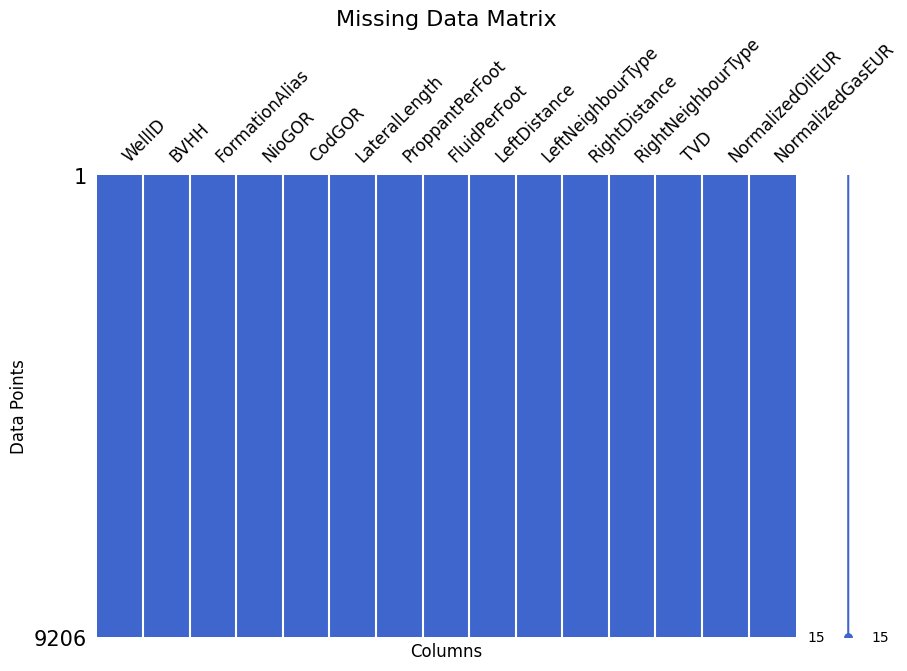

In [37]:
plot_missing_data_matrix(data)

In [38]:
data.isnull().sum()

WellID                0
BVHH                  0
FormationAlias        0
NioGOR                0
CodGOR                0
LateralLength         0
ProppantPerFoot       0
FluidPerFoot          0
LeftDistance          0
LeftNeighbourType     0
RightDistance         0
RightNeighbourType    0
TVD                   0
NormalizedOilEUR      0
NormalizedGasEUR      0
dtype: int64

In [39]:
data.head(20)

WellID      BVHH FormationAlias       NioGOR       CodGOR  \
0   500109742  1.105028       NIOBRARA  1687.414535     0.000000   
1   500109753  0.644480       NIOBRARA  2267.667384     0.000000   
2   500109754  0.620268       NIOBRARA  2368.236087     0.000000   
3   500109760  0.649670       NIOBRARA   333.876618     0.000000   
4   500109772  1.423475       NIOBRARA  3608.065949     0.000000   
5   500109773  1.368585       NIOBRARA  3899.971877     0.000000   
6   500109775  1.392838       NIOBRARA  3769.822078     0.000000   
7   500109777  1.372893         CODELL     0.000000  3171.913583   
8   500109779  1.168352       NIOBRARA  1784.744088     0.000000   
9   500109805  1.182178       NIOBRARA  1846.999552     0.000000   
10  500109826  1.439283       NIOBRARA  3933.456074     0.000000   
11  500109841  0.894736         CODELL     0.000000  3190.199457   
12  500109845  0.775735         CODELL     0.000000  1557.666119   
13  500109847  0.765930         CODELL     0.000000  1183.174029   
14  500109848  1.031304       NIOBRARA  3454.440315     0.000000   
15  500109858  0.750506         CODELL     0.000000  1126.227805   
16  500109860  1.487993       NIOBRARA  1804.764588     0.000000   
17  500109866  1.456688       NIOBRARA  1899.440485     0.000000   
18  500109873  1.031304       NIOBRARA  3454.440315     0.000000   
19  500109877  1.031304         CODELL     0.000000  3155.569153   

    LateralLength  ProppantPerFoot  FluidPerFoot  LeftDistance  \
0          8084.0      1256.308758   1234.370856           0.0   
1          3912.0       742.842536    784.000000           0.0   
2          4137.0       912.738700   1127.047136        1330.0   
3          4161.0       914.683970    691.026676           0.0   
4          4418.0       747.271843    928.239928           0.0   
5          4246.0       709.373528    957.364578           0.0   
6          4273.0       955.707933   1027.864732         601.0   
7          4393.0       893.694514    796.078306           0.0   
8          3896.0      1975.872690   1308.910164           0.0   
9          8400.0      1398.333333    907.660000           0.0   
10         4225.0       860.591716    719.228876           0.0   
11         4297.0       828.484989    781.305562         503.0   
12         4434.0       992.499549    862.066743           0.0   
13         4508.0       952.972493   1326.214286           0.0   
14        16657.0       659.422465    734.012427           0.0   
15         9907.0      1739.522560   1817.090340           0.0   
16         9879.0      1744.103654   1740.727604           0.0   
17        10027.0       967.188591    903.149097         739.0   
18        12880.0       701.863354    884.988820           0.0   
19        12876.0       698.353526    650.157813           0.0   

   LeftNeighbourType  RightDistance RightNeighbourType          TVD  \
0        NoNeighbour            0.0        NoNeighbour  7501.000000   
1        NoNeighbour         1330.0        Codeveloped  7551.000000   
2        Codeveloped            0.0        NoNeighbour  7594.000000   
3        NoNeighbour            0.0        NoNeighbour  7391.000000   
4        NoNeighbour            0.0        NoNeighbour  7838.000000   
5        NoNeighbour          601.0        Codeveloped  7941.000000   
6        Codeveloped          569.0             Parent  7949.000000   
7        NoNeighbour          629.0             Parent  8078.000000   
8        NoNeighbour            0.0        NoNeighbour  7629.000000   
9        NoNeighbour            0.0        NoNeighbour  7999.000000   
10       NoNeighbour            0.0        NoNeighbour  7865.000000   
11            Parent            0.0        NoNeighbour  8075.000000   
12       NoNeighbour            0.0        NoNeighbour  7856.000000   
13       NoNeighbour            0.0        NoNeighbour  7742.000000   
14       NoNeighbour            0.0        NoNeighbour  7013.938041   
15       NoNeighbour            0.0        NoNeighbour 

# **Data Visulization And Analysis**

In [40]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
numeric_data.drop(columns=['WellID'], inplace=True)
numeric_data.head()

BVHH       NioGOR  CodGOR  LateralLength  ProppantPerFoot  \
0  1.105028  1687.414535     0.0         8084.0      1256.308758   
1  0.644480  2267.667384     0.0         3912.0       742.842536   
2  0.620268  2368.236087     0.0         4137.0       912.738700   
3  0.649670   333.876618     0.0         4161.0       914.683970   
4  1.423475  3608.065949     0.0         4418.0       747.271843   

   FluidPerFoot  LeftDistance  RightDistance     TVD  NormalizedOilEUR  \
0   1234.370856           0.0            0.0  7501.0         15.234785   
1    784.000000           0.0         1330.0  7551.0          5.327198   
2   1127.047136        1330.0            0.0  7594.0          5.629925   
3    691.026676           0.0            0.0  7391.0          8.240087   
4    928.239928           0.0            0.0  7838.0         15.374830   

   NormalizedGasEUR  
0         37.674048  
1         11.627301  
2         14.544356  
3          7.012257  
4         51.169534

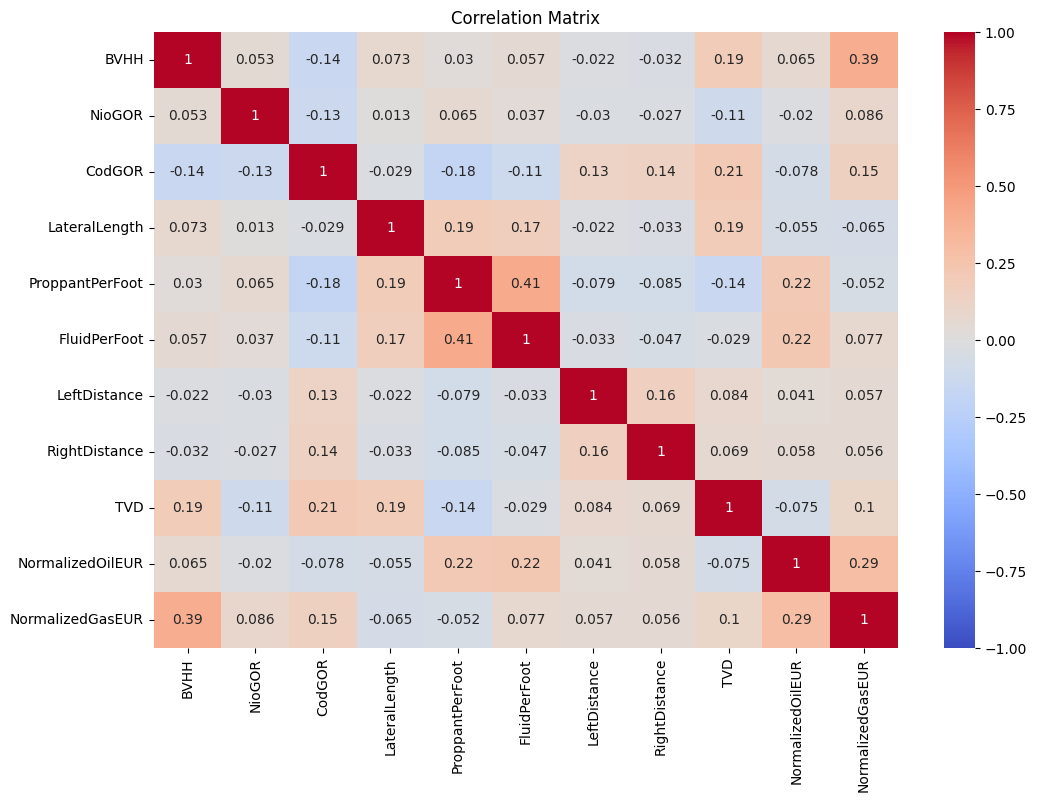

In [41]:
corr_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

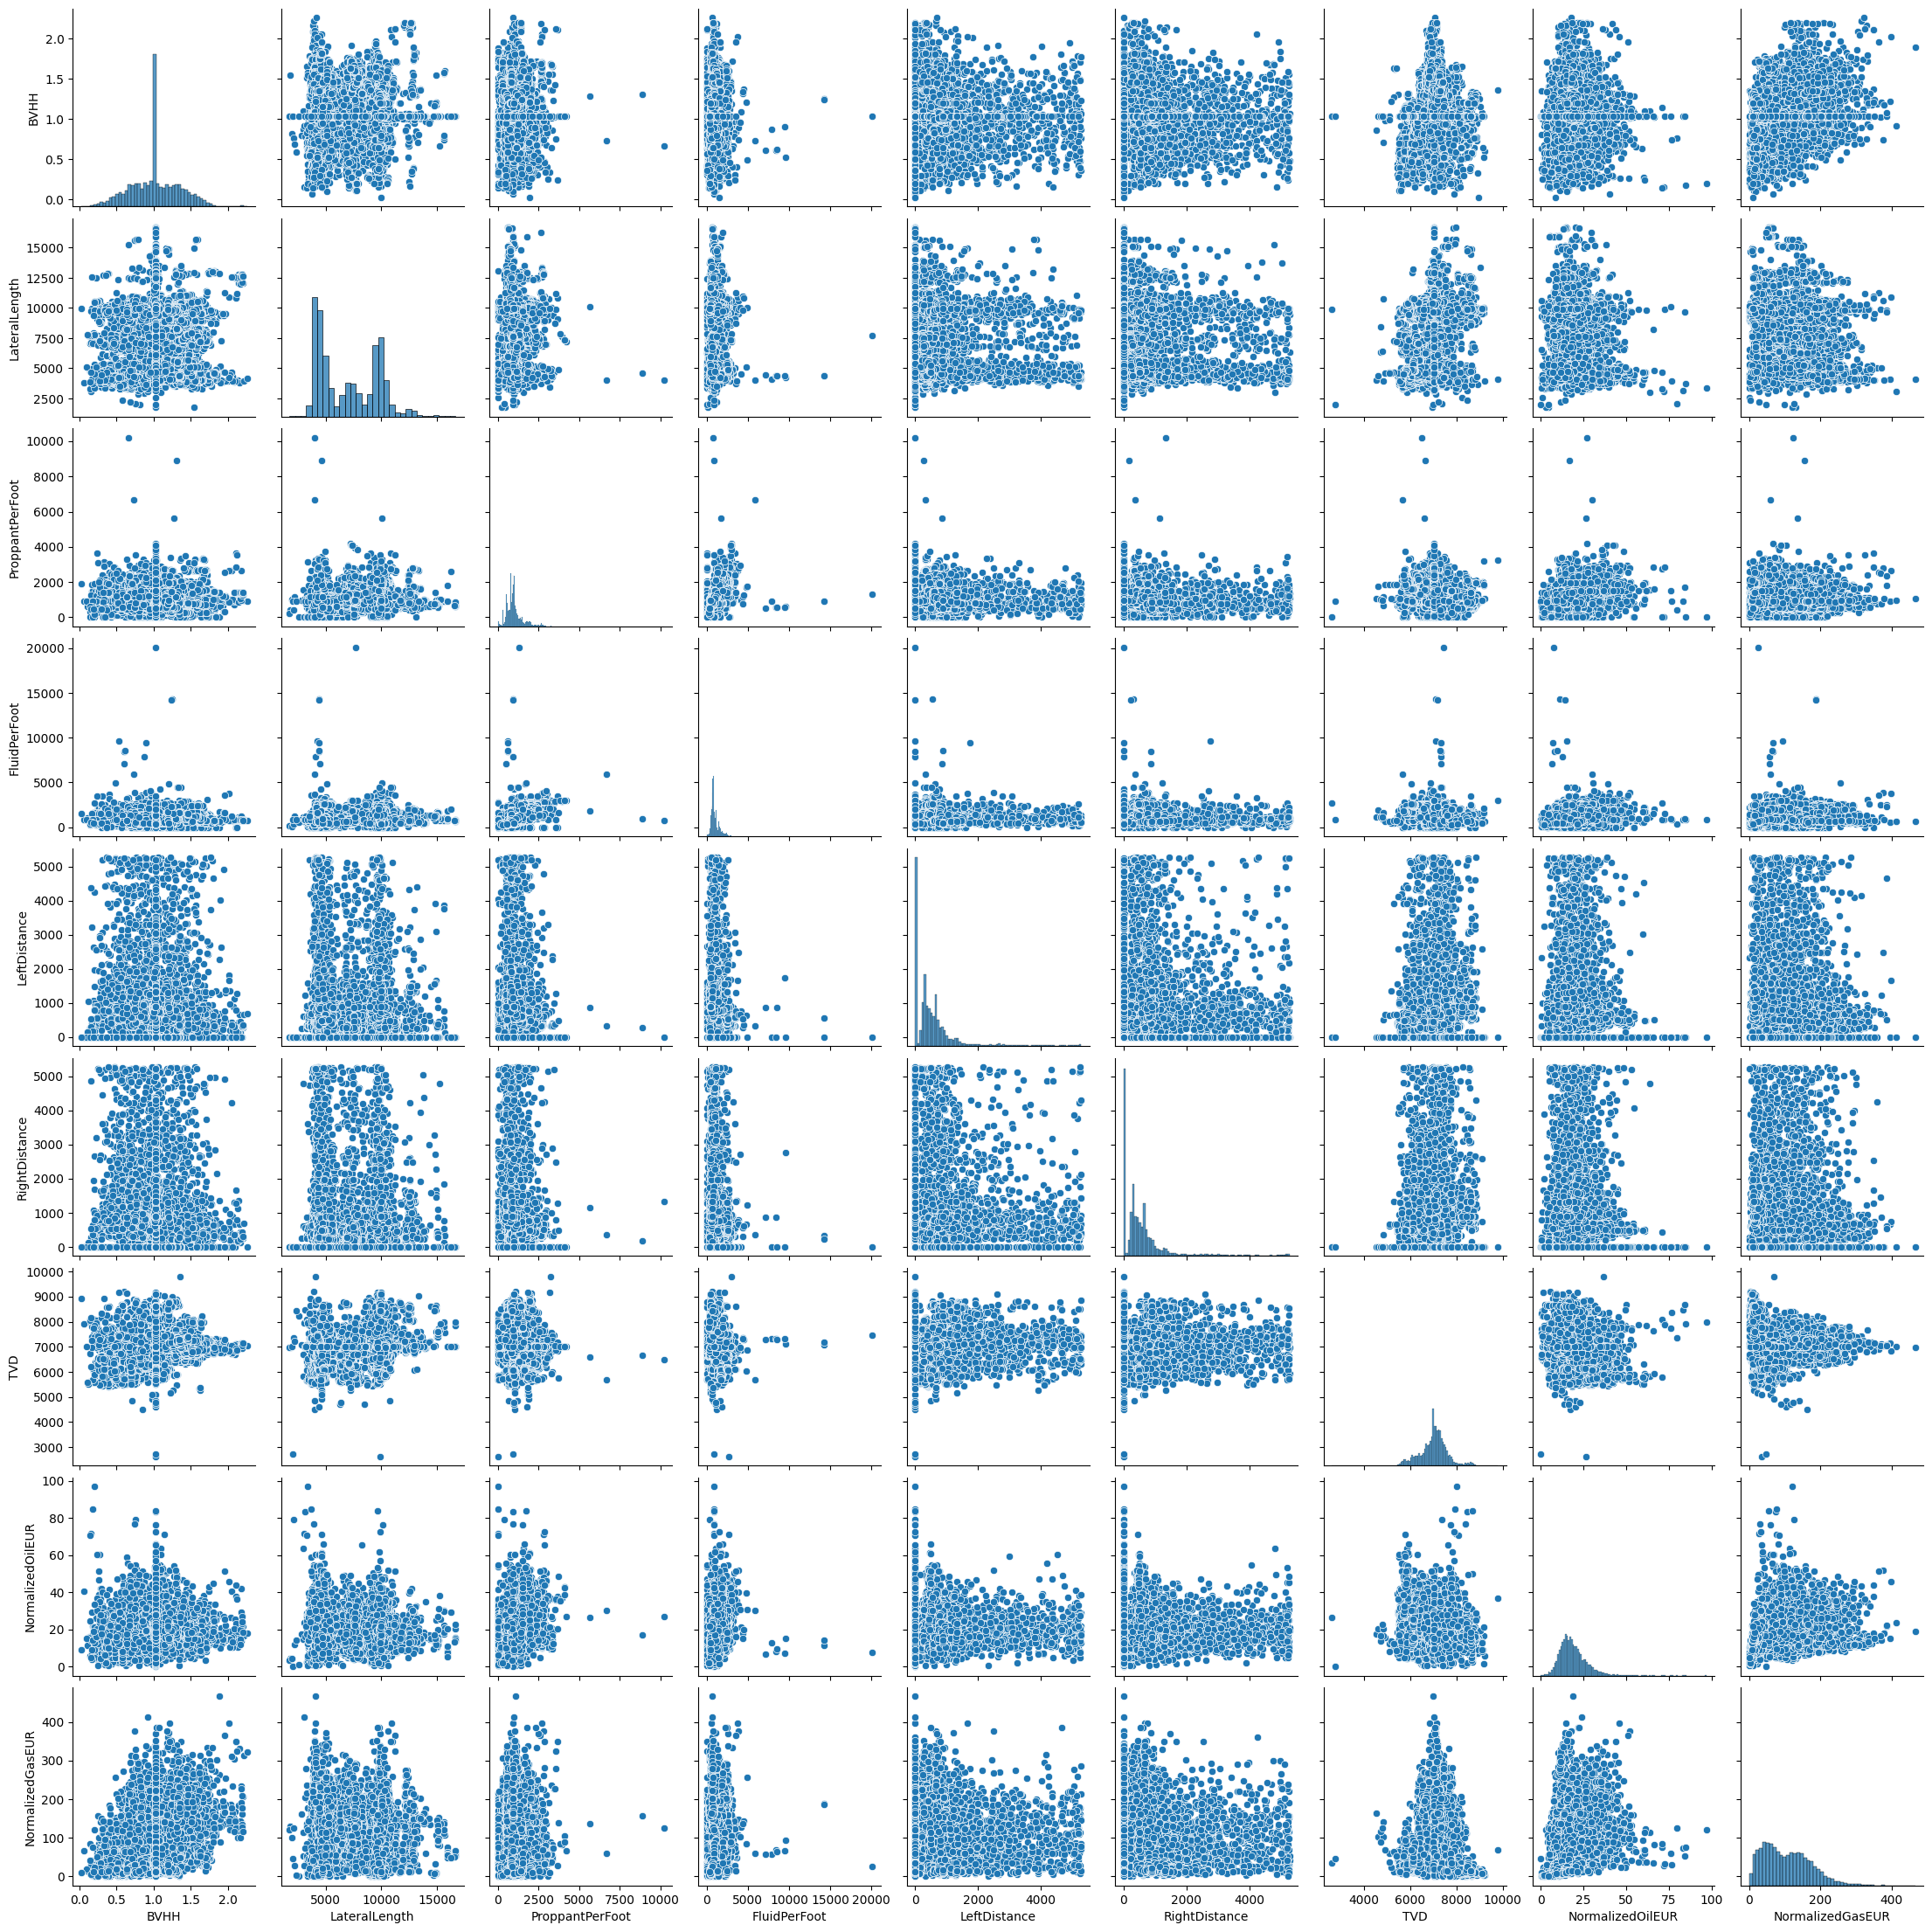

In [42]:
cols_to_plot = ['BVHH', 'LateralLength', 'ProppantPerFoot', 'FluidPerFoot',
                'LeftDistance', 'RightDistance', 'TVD', 'NormalizedOilEUR', 'NormalizedGasEUR']
sns.pairplot(data[cols_to_plot])
plt.show()

**Scatter plots for features vs. NormalizedOilEUR**

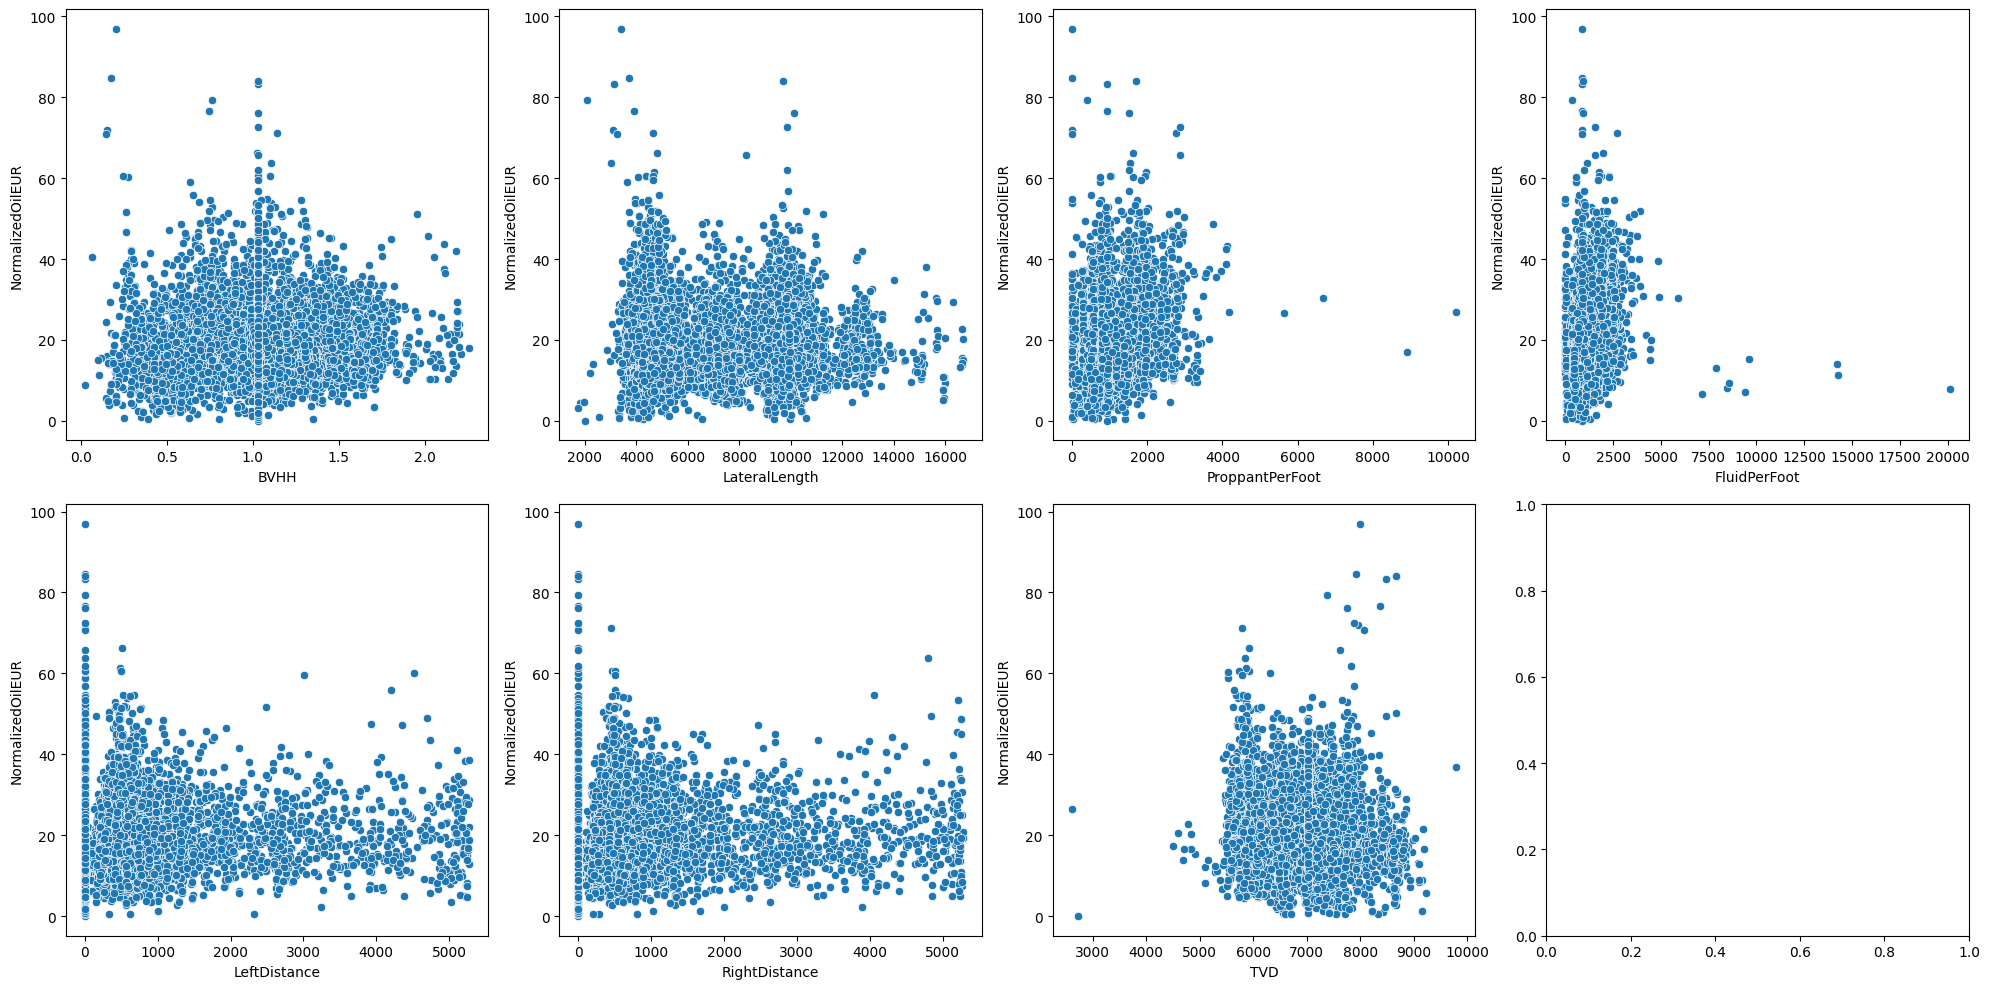

In [43]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
features = ['BVHH', 'LateralLength', 'ProppantPerFoot', 'FluidPerFoot',
            'LeftDistance', 'RightDistance', 'TVD']

for i, feature in enumerate(features):
    sns.scatterplot(data=data, x=feature, y='NormalizedOilEUR', ax=axes[i//4, i%4])
plt.tight_layout()
plt.show()

**Scatter plots for features vs. NormalizedGasEUR**

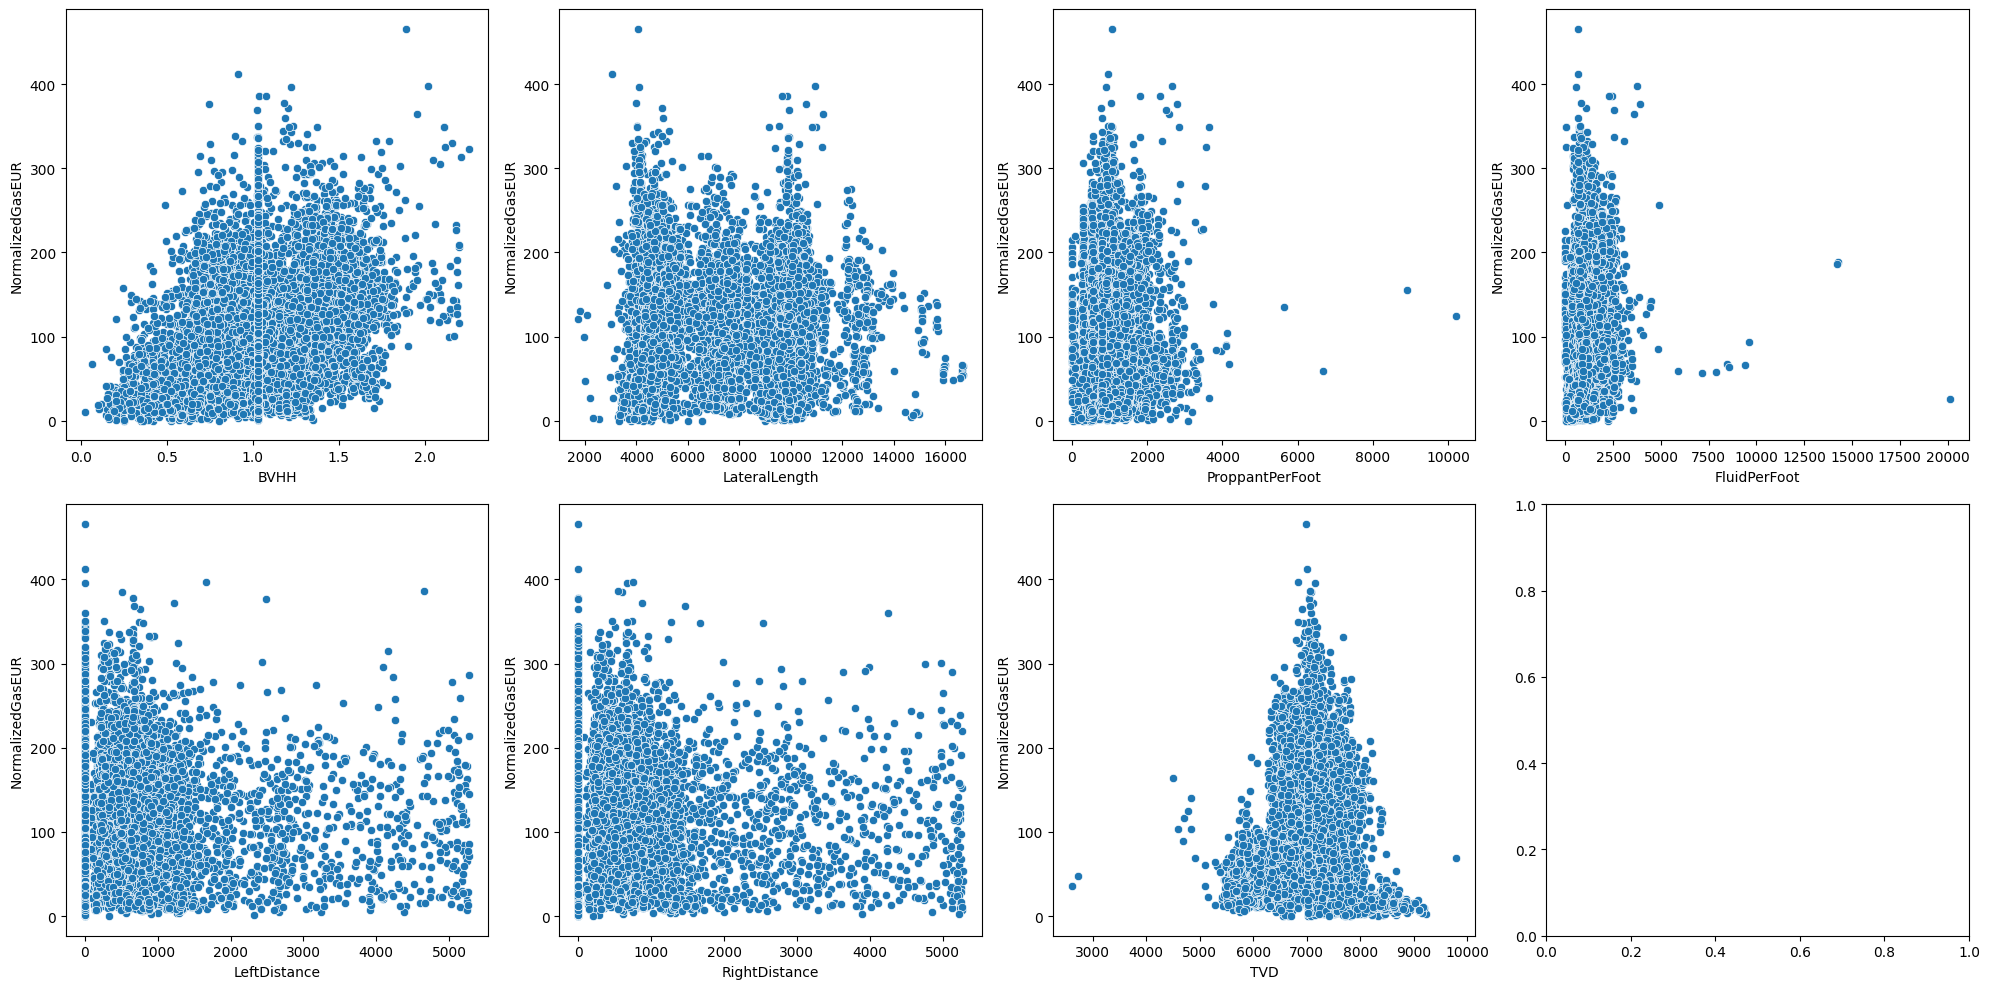

In [44]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
features = ['BVHH', 'LateralLength', 'ProppantPerFoot', 'FluidPerFoot',
            'LeftDistance', 'RightDistance', 'TVD']

for i, feature in enumerate(features):
    sns.scatterplot(data=data, x=feature, y='NormalizedGasEUR', ax=axes[i//4, i%4])
plt.tight_layout()
plt.show()

**Histograms for all numerical features**

In [45]:
def plot_histograms(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_cols:
        fig = px.histogram(df, x=col, title=f'Histogram of {col}')
        fig.show()
plot_histograms(data)

**Box plots for all numerical features**

In [46]:
def plot_box_plots(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_cols:
        fig = px.box(df, y=col, title=f'Box Plot of {col}')
        fig.show()
plot_box_plots(data)

**Correlation heatmap for all numerical features**

In [47]:
def plot_heatmap(df):
    numerical_data = df.select_dtypes(include=['float64', 'int64'])
    correlation = numerical_data.corr()
    fig = px.imshow(correlation, text_auto=True, title='Heatmap of Feature Correlations')
    fig.show()
plot_heatmap(data)

**Bar plots for categorical features**

In [48]:
def plot_categorical_distribution(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        fig = px.histogram(df, x=col, title=f'Distribution of {col}')
        fig.show()
plot_categorical_distribution(data)

**5. Violin plots for NormalizedOilEUR and NormalizedGasEUR across categorical features**

In [49]:
def plot_violin_plots(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        fig_oil = px.violin(df, y='NormalizedOilEUR', x=col, box=True, points="all", title=f'Violin Plot of NormalizedOilEUR by {col}')
        fig_gas = px.violin(df, y='NormalizedGasEUR', x=col, box=True, points="all", title=f'Violin Plot of NormalizedGasEUR by {col}')
        fig_oil.show()
        fig_gas.show()
plot_violin_plots(data)

#**Extract New Features**

*   ProppantPerFootRatio
*   FluidPerFootRatio
*   ProppantFluidRatio
*   TotalDistance
*   AverageGOR
*   LogTVD
*   LogLateralLength
*   IsNiobrara
*   IsCodell

In [50]:
data['ProppantPerFootRatio'] = data['ProppantPerFoot'] / data['LateralLength']
data['FluidPerFootRatio'] = data['FluidPerFoot'] / data['LateralLength']
data['ProppantFluidRatio'] = data['ProppantPerFoot'] / data['FluidPerFoot']
data['TotalDistance'] = data['LeftDistance'] + data['RightDistance']
data['AverageGOR'] = data[['NioGOR', 'CodGOR']].mean(axis=1)

data['LogTVD'] = np.log1p(data['TVD'])
data['LogLateralLength'] = np.log1p(data['LateralLength'])

data = pd.get_dummies(data, columns=['FormationAlias', 'LeftNeighbourType', 'RightNeighbourType'])

data['IsNiobrara'] = data['FormationAlias_NIOBRARA']
data['IsCodell'] = data['FormationAlias_CODELL']


# **Drop Unwanted Features**



In [51]:
data.drop(columns=['FormationAlias_NIOBRARA', 'FormationAlias_CODELL', 'TVD','LateralLength', 'WellID', 'LogLateralLength'], inplace=True)
data.head()

BVHH       NioGOR  CodGOR  ProppantPerFoot  FluidPerFoot  LeftDistance  \
0  1.105028  1687.414535     0.0      1256.308758   1234.370856           0.0   
1  0.644480  2267.667384     0.0       742.842536    784.000000           0.0   
2  0.620268  2368.236087     0.0       912.738700   1127.047136        1330.0   
3  0.649670   333.876618     0.0       914.683970    691.026676           0.0   
4  1.423475  3608.065949     0.0       747.271843    928.239928           0.0   

   RightDistance  NormalizedOilEUR  NormalizedGasEUR  ProppantPerFootRatio  \
0            0.0         15.234785         37.674048              0.155407   
1         1330.0          5.327198         11.627301              0.189888   
2            0.0          5.629925         14.544356              0.220628   
3            0.0          8.240087          7.012257              0.219823   
4            0.0         15.374830         51.169534              0.169143   

   ...   AverageGOR    LogTVD  LeftNeighbourType_Codeveloped  \
0  ...   843.707267  8.922925                          False   
1  ...  1133.833692  8.929568                          False   
2  ...  1184.118044  8.935245                           True   
3  ...   166.938309  8.908154                          False   
4  ...  1804.032974  8.966867                          False   

   LeftNeighbourType_NoNeighbour  LeftNeighbourType_Parent  \
0                           True                     False   
1                           True                     False   
2                          False                     False   
3                           True                     False   
4                           True                     False   

   RightNeighbourType_Codeveloped  RightNeighbourType_NoNeighbour  \
0                           False                            True   
1                            True                           False   
2                           False                            True   
3                           False                            True   
4                           False                            True   

   RightNeighbourType_Parent  IsNiobrara  IsCodell  
0                      False        True     False  
1                      False        True     False  
2                      False        True     False  
3                      False        True     False  
4                      False        True     False  

[5 rows x 23 columns]

In [52]:
data.columns

Index(['BVHH', 'NioGOR', 'CodGOR', 'ProppantPerFoot', 'FluidPerFoot',
       'LeftDistance', 'RightDistance', 'NormalizedOilEUR', 'NormalizedGasEUR',
       'ProppantPerFootRatio', 'FluidPerFootRatio', 'ProppantFluidRatio',
       'TotalDistance', 'AverageGOR', 'LogTVD',
       'LeftNeighbourType_Codeveloped', 'LeftNeighbourType_NoNeighbour',
       'LeftNeighbourType_Parent', 'RightNeighbourType_Codeveloped',
       'RightNeighbourType_NoNeighbour', 'RightNeighbourType_Parent',
       'IsNiobrara', 'IsCodell'],
      dtype='object')

In [53]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

In [54]:
plot_heatmap(data)

**Handle Outlier using IQR(Interquartile Range)**

In [55]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

data_cleaned = data.copy()
for col in numeric_cols:
    data_cleaned = remove_outliers(data_cleaned, col)

data_cleaned

BVHH       NioGOR      CodGOR  ProppantPerFoot  FluidPerFoot  \
0     1.105028  1687.414535    0.000000      1256.308758   1234.370856   
1     0.644480  2267.667384    0.000000       742.842536    784.000000   
2     0.620268  2368.236087    0.000000       912.738700   1127.047136   
3     0.649670   333.876618    0.000000       914.683970    691.026676   
4     1.423475  3608.065949    0.000000       747.271843    928.239928   
...        ...          ...         ...              ...           ...   
9162  1.018615     0.000000  699.642237       498.029454    404.248911   
9163  0.498383   771.727211    0.000000      1224.791037    874.698737   
9170  1.031304     0.000000  953.774670       166.209197    331.188668   
9171  1.031304  1920.568581    0.000000       250.715168    257.190574   
9205  1.031304     0.000000  472.746854       544.153011    353.446868   

      LeftDistance  RightDistance  NormalizedOilEUR  NormalizedGasEUR  \
0              0.0            0.0         15.234785         37.674048   
1              0.0         1330.0          5.327198         11.627301   
2           1330.0            0.0          5.629925         14.544356   
3              0.0            0.0          8.240087          7.012257   
4              0.0            0.0         15.374830         51.169534   
...            ...            ...               ...               ...   
9162         891.0          884.0         15.266646         10.746318   
9163           0.0            0.0         16.340210         19.819936   
9170           0.0            0.0          2.014987          1.471772   
9171           0.0            0.0          1.880222          3.524799   
9205           0.0            0.0         21.549311         11.413491   

      ProppantPerFootRatio  ...   AverageGOR    LogTVD  \
0                 0.155407  ...   843.707267  8.922925   
1                 0.189888  ...  1133.833692  8.929568   
2                 0.220628  ...  1184.118044  8.935245   
3                 0.219823  ...   166.938309  8.908154   
4                 0.169143  ...  1804.032974  8.966867   
...                    ...  ...          ...       ...   
9162              0.051652  ...   349.821118  9.015420   
9163              0.108909  ...   385.863606  9.012377   
9170              0.017061  ...   476.887335  8.967632   
9171              0.025799  ...   960.284290  8.960853   
9205              0.054705  ...   236.373427  8.990940   

      LeftNeighbourType_Codeveloped  LeftNeighbourType_NoNeighbour  \
0                             False                           True   
1                             False                           True   
2                              True                          False   
3                             False                           True   
4                             False                           True   
...                             ...                            ...   
9162                           True                          False   
9163                          False                           True   
9170                          False                           True   
9171                          False                           True   
9205                          False                           True   

      LeftNeighbourType_Parent  RightNeighbourType_Codeveloped  \
0                        False                           False   
1                        False                            True   
2                        False                           False   
3                        False                           False   
4                        False                           False   
...                        ...                             ...   
9162                     False                            True   
9163                     False                           False   
9170                     False                           False   
9171                     False                

In [56]:
plot_box_plots(data_cleaned)

# **Splitting Data**

- Features
- Targets (NormalizedOilEUR, NormalizedGasEUR)

In [57]:
data

BVHH       NioGOR      CodGOR  ProppantPerFoot  FluidPerFoot  \
0     1.105028  1687.414535    0.000000      1256.308758   1234.370856   
1     0.644480  2267.667384    0.000000       742.842536    784.000000   
2     0.620268  2368.236087    0.000000       912.738700   1127.047136   
3     0.649670   333.876618    0.000000       914.683970    691.026676   
4     1.423475  3608.065949    0.000000       747.271843    928.239928   
...        ...          ...         ...              ...           ...   
9201  1.031304     0.000000  949.853322      1393.493883   2462.864733   
9202  1.031304     0.000000  397.429199      2758.550901   1364.672738   
9203  1.031304     0.000000  336.475960      2531.677278   1290.361340   
9204  1.031304     0.000000  519.208816      1536.333026   1992.940418   
9205  1.031304     0.000000  472.746854       544.153011    353.446868   

      LeftDistance  RightDistance  NormalizedOilEUR  NormalizedGasEUR  \
0              0.0            0.0         15.234785         37.674048   
1              0.0         1330.0          5.327198         11.627301   
2           1330.0            0.0          5.629925         14.544356   
3              0.0            0.0          8.240087          7.012257   
4              0.0            0.0         15.374830         51.169534   
...            ...            ...               ...               ...   
9201        1325.0            0.0         18.513690         15.231737   
9202           0.0            0.0         33.791844         12.357013   
9203           0.0            0.0         27.725394         14.413422   
9204           0.0            0.0         36.654894         35.377252   
9205           0.0            0.0         21.549311         11.413491   

      ProppantPerFootRatio  ...   AverageGOR    LogTVD  \
0                 0.155407  ...   843.707267  8.922925   
1                 0.189888  ...  1133.833692  8.929568   
2                 0.220628  ...  1184.118044  8.935245   
3                 0.219823  ...   166.938309  8.908154   
4                 0.169143  ...  1804.032974  8.966867   
...                    ...  ...          ...       ...   
9201              0.162355  ...   474.926661  9.061144   
9202              0.279149  ...   198.714599  8.940105   
9203              0.264239  ...   168.237980  8.934982   
9204              0.157282  ...   259.604408  8.959826   
9205              0.054705  ...   236.373427  8.990940   

      LeftNeighbourType_Codeveloped  LeftNeighbourType_NoNeighbour  \
0                             False                           True   
1                             False                           True   
2                              True                          False   
3                             False                           True   
4                             False                           True   
...                             ...                            ...   
9201                           True                          False   
9202                          False                           True   
9203                          False                           True   
9204                          False                           True   
9205                          False                           True   

      LeftNeighbourType_Parent  RightNeighbourType_Codeveloped  \
0                        False                           False   
1                        False                            True   
2                        False                           False   
3                        False                           False   
4                        False                           False   
...                        ...                             ...   
9201                     False                           False   
9202                     False                           False   
9203                     False                           False   
9204                     False                

In [58]:
data_cleaned

BVHH       NioGOR      CodGOR  ProppantPerFoot  FluidPerFoot  \
0     1.105028  1687.414535    0.000000      1256.308758   1234.370856   
1     0.644480  2267.667384    0.000000       742.842536    784.000000   
2     0.620268  2368.236087    0.000000       912.738700   1127.047136   
3     0.649670   333.876618    0.000000       914.683970    691.026676   
4     1.423475  3608.065949    0.000000       747.271843    928.239928   
...        ...          ...         ...              ...           ...   
9162  1.018615     0.000000  699.642237       498.029454    404.248911   
9163  0.498383   771.727211    0.000000      1224.791037    874.698737   
9170  1.031304     0.000000  953.774670       166.209197    331.188668   
9171  1.031304  1920.568581    0.000000       250.715168    257.190574   
9205  1.031304     0.000000  472.746854       544.153011    353.446868   

      LeftDistance  RightDistance  NormalizedOilEUR  NormalizedGasEUR  \
0              0.0            0.0         15.234785         37.674048   
1              0.0         1330.0          5.327198         11.627301   
2           1330.0            0.0          5.629925         14.544356   
3              0.0            0.0          8.240087          7.012257   
4              0.0            0.0         15.374830         51.169534   
...            ...            ...               ...               ...   
9162         891.0          884.0         15.266646         10.746318   
9163           0.0            0.0         16.340210         19.819936   
9170           0.0            0.0          2.014987          1.471772   
9171           0.0            0.0          1.880222          3.524799   
9205           0.0            0.0         21.549311         11.413491   

      ProppantPerFootRatio  ...   AverageGOR    LogTVD  \
0                 0.155407  ...   843.707267  8.922925   
1                 0.189888  ...  1133.833692  8.929568   
2                 0.220628  ...  1184.118044  8.935245   
3                 0.219823  ...   166.938309  8.908154   
4                 0.169143  ...  1804.032974  8.966867   
...                    ...  ...          ...       ...   
9162              0.051652  ...   349.821118  9.015420   
9163              0.108909  ...   385.863606  9.012377   
9170              0.017061  ...   476.887335  8.967632   
9171              0.025799  ...   960.284290  8.960853   
9205              0.054705  ...   236.373427  8.990940   

      LeftNeighbourType_Codeveloped  LeftNeighbourType_NoNeighbour  \
0                             False                           True   
1                             False                           True   
2                              True                          False   
3                             False                           True   
4                             False                           True   
...                             ...                            ...   
9162                           True                          False   
9163                          False                           True   
9170                          False                           True   
9171                          False                           True   
9205                          False                           True   

      LeftNeighbourType_Parent  RightNeighbourType_Codeveloped  \
0                        False                           False   
1                        False                            True   
2                        False                           False   
3                        False                           False   
4                        False                           False   
...                        ...                             ...   
9162                     False                            True   
9163                     False                           False   
9170                     False                           False   
9171                     False                

In [59]:
features = data_cleaned.drop(columns = ['NormalizedOilEUR', 'NormalizedGasEUR'])
targets = data_cleaned[['NormalizedOilEUR', 'NormalizedGasEUR']]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.1, random_state=150)

In [61]:
data_cleaned.dtypes

BVHH                              float64
NioGOR                            float64
CodGOR                            float64
ProppantPerFoot                   float64
FluidPerFoot                      float64
LeftDistance                      float64
RightDistance                     float64
NormalizedOilEUR                  float64
NormalizedGasEUR                  float64
ProppantPerFootRatio              float64
FluidPerFootRatio                 float64
ProppantFluidRatio                float64
TotalDistance                     float64
AverageGOR                        float64
LogTVD                            float64
LeftNeighbourType_Codeveloped        bool
LeftNeighbourType_NoNeighbour        bool
LeftNeighbourType_Parent             bool
RightNeighbourType_Codeveloped       bool
RightNeighbourType_NoNeighbour       bool
RightNeighbourType_Parent            bool
IsNiobrara                           bool
IsCodell                             bool
dtype: object

**Change Features with bool data type into int**

In [62]:
bool_columns = [
    'LeftNeighbourType_Codeveloped', 'LeftNeighbourType_NoNeighbour', 'LeftNeighbourType_Parent',
    'RightNeighbourType_Codeveloped', 'RightNeighbourType_NoNeighbour', 'RightNeighbourType_Parent',
    'IsNiobrara', 'IsCodell'
]

X_train[bool_columns] = X_train[bool_columns].astype(int)
X_test[bool_columns] = X_test[bool_columns].astype(int)

In [63]:
y_train_oil = y_train['NormalizedOilEUR']
y_train_gas = y_train['NormalizedGasEUR']
y_test_oil = y_test['NormalizedOilEUR']
y_test_gas = y_test['NormalizedGasEUR']

In [64]:
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)
print('y_train_oil: ', y_train_oil.shape)
print('y_train_gas: ', y_train_gas.shape)
print('y_test_oil: ', y_test_oil.shape)
print('y_test_gas: ', y_test_gas.shape)

X_train:  (3790, 21)
X_test:  (422, 21)
y_train:  (3790, 2)
y_test:  (422, 2)
y_train_oil:  (3790,)
y_train_gas:  (3790,)
y_test_oil:  (422,)
y_test_gas:  (422,)


In [65]:
preprocessor = ColumnTransformer(transformers=[], remainder='passthrough')

# **''Building Models''**

The list of Models Used

*   XGBRegressor
*   Random Forest Regressor
*   Lasso
*   Ridge
*   Gradient Boosting Regressor
*   SVR with RBF Kernel



# **XGBRegressor**

In [66]:
pipeline_oil = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('regressor', XGBRegressor())
])

pipeline_gas = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('regressor', XGBRegressor())
])

param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [3, 5, 7],
    'regressor__learning_rate': [0.01, 0.1]
}

grid_search_oil = GridSearchCV(pipeline_oil, param_grid, cv=5, scoring='r2')
grid_search_oil.fit(X_train, y_train_oil)
best_model_oil = grid_search_oil.best_estimator_

grid_search_gas = GridSearchCV(pipeline_gas, param_grid, cv=5, scoring='r2')
grid_search_gas.fit(X_train, y_train_gas)
best_model_gas = grid_search_gas.best_estimator_

r2_train_oil = best_model_oil.score(X_train, y_train_oil)
r2_train_gas = best_model_gas.score(X_train, y_train_gas)

print(f'R^2 score for train oil production: {r2_train_oil}')
print(f'R^2 score for train gas production: {r2_train_gas}')

r2_oil = best_model_oil.score(X_test, y_test_oil)
r2_gas = best_model_gas.score(X_test, y_test_gas)

print(f'R^2 score for test oil production: {r2_oil}')
print(f'R^2 score for test gas production: {r2_gas}')

R^2 score for train oil production: 0.9497157840977117
R^2 score for train gas production: 0.9822149002803251
R^2 score for test oil production: 0.5526075597514029
R^2 score for test gas production: 0.8053567501867848


# **Random Forest Regerssor**

In [67]:
model_oil = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', RandomForestRegressor())])
model_oil.fit(X_train, y_train_oil)

model_gas = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', RandomForestRegressor())])
model_gas.fit(X_train, y_train_gas)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough', transformers=[])),
                ('regressor', RandomForestRegressor())])

In [68]:
y_pred__train_oil = model_oil.predict(X_train)
y_pred_train_gas = model_gas.predict(X_train)

print(f'R^2 score for train oil production: {r2_score(y_train_oil, y_pred__train_oil)}')
print(f'R^2 score for train gas production: {r2_score(y_train_gas, y_pred_train_gas)}')

y_pred_oil = model_oil.predict(X_test)
y_pred_gas = model_gas.predict(X_test)

print(f'R^2 score for test oil production: {r2_score(y_test_oil, y_pred_oil)}')
print(f'R^2 score for test gas production: {r2_score(y_test_gas, y_pred_gas)}')

R^2 score for train oil production: 0.9233585125444397
R^2 score for train gas production: 0.9662407430417409
R^2 score for test oil production: 0.5311575975720702
R^2 score for test gas production: 0.8080023611552298


# **Lasso**

In [69]:
model_oil_lasso = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('regressor', Lasso(max_iter=10000))])

model_gas_lasso = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('regressor', Lasso(max_iter=10000))])

param_grid = {
    'regressor__alpha': [0.01, 0.1, 1, 10, 100]
}

grid_search_oil_lasso = GridSearchCV(estimator=model_oil_lasso, param_grid=param_grid,
                                     cv=5, n_jobs=-1, scoring='r2', verbose=2)
grid_search_oil_lasso.fit(X_train, y_train_oil)

grid_search_gas_lasso = GridSearchCV(estimator=model_gas_lasso, param_grid=param_grid,
                                     cv=5, n_jobs=-1, scoring='r2', verbose=2)
grid_search_gas_lasso.fit(X_train, y_train_gas)

best_model_oil_lasso = grid_search_oil_lasso.best_estimator_
best_model_gas_lasso = grid_search_gas_lasso.best_estimator_

r2_train_oil_lasso = best_model_oil_lasso.score(X_train, y_train_oil)
r2_train_gas_lasso = best_model_gas_lasso.score(X_train, y_train_gas)

print(f'R^2 score for train oil production with Lasso: {r2_train_oil_lasso}')
print(f'R^2 score for train gas production with Lasso: {r2_train_gas_lasso}')

r2_oil_lasso = best_model_oil_lasso.score(X_test, y_test_oil)
r2_gas_lasso = best_model_gas_lasso.score(X_test, y_test_gas)

print(f'R^2 score for test oil production with Lasso: {r2_oil_lasso}')
print(f'R^2 score for test gas production with Lasso: {r2_gas_lasso}')

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.522e+04, tolerance: 1.315e+01



Fitting 5 folds for each of 5 candidates, totalling 25 fits
R^2 score for train oil production with Lasso: 0.1695375175677507
R^2 score for train gas production with Lasso: 0.6301461578289091
R^2 score for test oil production with Lasso: 0.20974691652397814
R^2 score for test gas production with Lasso: 0.6822259788558824


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.103e+06, tolerance: 1.306e+03



# **Ridge**

In [70]:
model_oil_ridge = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('regressor', Ridge())])

model_gas_ridge = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('regressor', Ridge())])

param_grid = {
    'regressor__alpha': [0.01, 0.1, 1, 10, 100]
}

grid_search_oil_ridge = GridSearchCV(estimator=model_oil_ridge, param_grid=param_grid,
                                     cv=5, n_jobs=-1, scoring='r2', verbose=2)
grid_search_oil_ridge.fit(X_train, y_train_oil)

grid_search_gas_ridge = GridSearchCV(estimator=model_gas_ridge, param_grid=param_grid,
                                     cv=5, n_jobs=-1, scoring='r2', verbose=2)
grid_search_gas_ridge.fit(X_train, y_train_gas)

best_model_oil_ridge = grid_search_oil_ridge.best_estimator_
best_model_gas_ridge = grid_search_gas_ridge.best_estimator_

r2_train_oil_ridge = best_model_oil_ridge.score(X_train, y_train_oil)
r2_train_gas_ridge = best_model_gas_ridge.score(X_train, y_train_gas)

print(f'R^2 score for train oil production with Ridge: {r2_train_oil_ridge}')
print(f'R^2 score for train gas production with Ridge: {r2_train_gas_ridge}')

r2_oil_ridge = best_model_oil_ridge.score(X_test, y_test_oil)
r2_gas_ridge = best_model_gas_ridge.score(X_test, y_test_gas)

print(f'R^2 score for test oil production with Ridge: {r2_oil_ridge}')
print(f'R^2 score for test gas production with Ridge: {r2_gas_ridge}')

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
R^2 score for train oil production with Ridge: 0.17488635878473058
R^2 score for train gas production with Ridge: 0.6304256652205085
R^2 score for test oil production with Ridge: 0.2081950021554939
R^2 score for test gas production with Ridge: 0.6830201205767036


# **Gradient Boosting Regressor**

In [71]:
model_oil_GB = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', GradientBoostingRegressor())])
model_oil_GB.fit(X_train, y_train_oil)

model_gas_GB = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', GradientBoostingRegressor())])
model_gas_GB.fit(X_train, y_train_gas)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough', transformers=[])),
                ('regressor', GradientBoostingRegressor())])

In [72]:
y_pred_train_oil = model_oil_GB.predict(X_train)
y_pred_train_gas = model_gas_GB.predict(X_train)

print(f'R^2 score for train oil production: {r2_score(y_train_oil, y_pred_train_oil)}')
print(f'R^2 score for train gas production: {r2_score(y_train_gas, y_pred_train_gas)}')

y_pred_oil = model_oil_GB.predict(X_test)
y_pred_gas = model_gas_GB.predict(X_test)

print(f'R^2 score for test oil production: {r2_score(y_test_oil, y_pred_oil)}')
print(f'R^2 score for test gas production: {r2_score(y_test_gas, y_pred_gas)}')

R^2 score for train oil production: 0.46716364993099035
R^2 score for train gas production: 0.7622556556920935
R^2 score for test oil production: 0.40617842458369235
R^2 score for test gas production: 0.7262102077165968


# **SVR with RBF Kernel**

In [73]:
svr_oil = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor', SVR(kernel='rbf'))])

svr_gas = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor', SVR(kernel='rbf'))])

svr_oil.fit(X_train, y_train_oil)
svr_gas.fit(X_train, y_train_gas)

y_pred_train_oil = svr_oil.predict(X_train)
y_pred_train_gas = svr_gas.predict(X_train)

print(f'R^2 score for train oil production: {r2_score(y_train_oil, y_pred_train_oil)}')
print(f'R^2 score for train gas production: {r2_score(y_train_gas, y_pred_train_gas)}')

y_pred_oil = svr_oil.predict(X_test)
y_pred_gas = svr_gas.predict(X_test)

print(f'R^2 score for test oil production: {r2_score(y_test_oil, y_pred_oil)}')
print(f'R^2 score for test gas production: {r2_score(y_test_gas, y_pred_gas)}')

R^2 score for train oil production: 0.09573444705695022
R^2 score for train gas production: 0.6058440674691737
R^2 score for test oil production: 0.1652363266382446
R^2 score for test gas production: 0.6653780299520711


# **Feature Importance Using SHAP for XGBRegressor( The Model With The Highest Accuracy)**

In [74]:
explainer_oil = shap.Explainer(best_model_oil.named_steps['regressor'], X_train)
shap_values_oil = explainer_oil(X_train)

 98%|===================| 3710/3790 [00:17<00:00]       

In [75]:
explainer_gas = shap.Explainer(best_model_gas.named_steps['regressor'], X_train)
shap_values_gas = explainer_gas(X_train)

 99%|===================| 3751/3790 [00:18<00:00]       

# **Summary Plot**

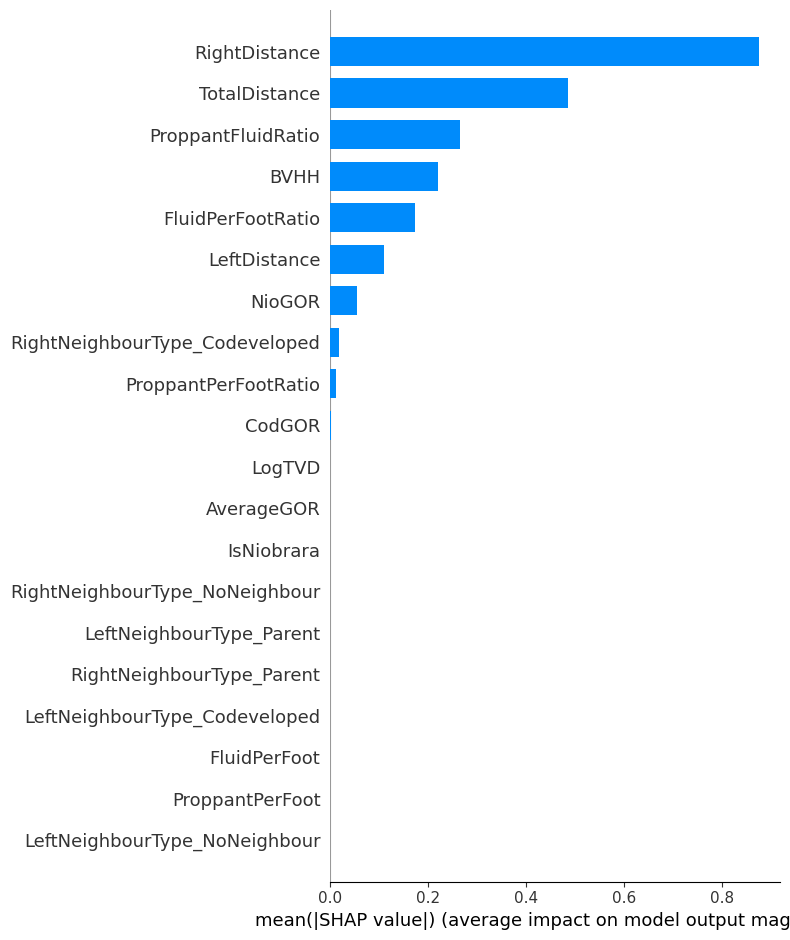

In [76]:
shap.summary_plot(shap_values_oil, X_train, plot_type="bar", feature_names=features.columns)

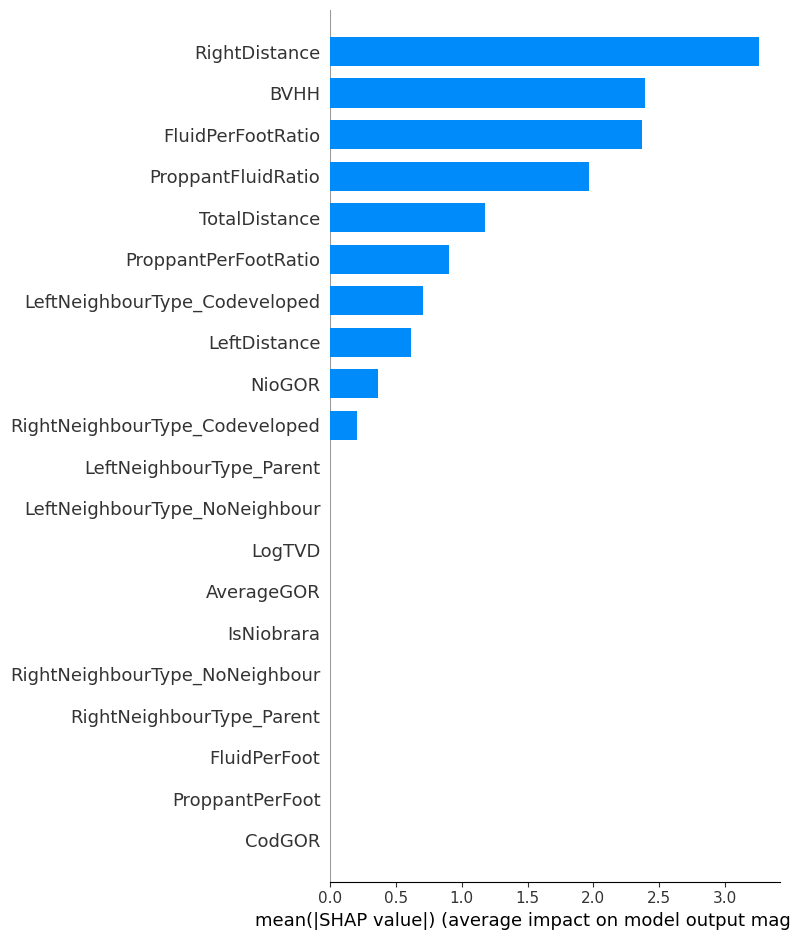

In [77]:
shap.summary_plot(shap_values_gas, X_train, plot_type="bar", feature_names=features.columns)